In [9]:
 from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
#print digits data
print(digits.data)
#load iris data


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [13]:
#print(digits.target)
#now The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape (8, 8) and can be accessed using:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [19]:
"""In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.
In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).An example of an estimator is the class sklearn.svm.SVC, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters."""
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)


In [31]:
'''The clf (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing our training set to the fit method. For the training set, we’ll use all the images from our dataset, except for the last image, which we’ll reserve for our predicting. We select the training set with the [:-1] Python syntax, which produces a new array that contains all but the last item from digits.data:'''
clf.fit(digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, gamma=0.001)

In [33]:
clf.predict(digits.data[-1:])

array([8])

In [41]:
clf.predict(digits.data[-1:])

array([8])

The clf (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing our training set to the fit method. For the training set, we’ll use all the images from our dataset, except for the last image, which we’ll reserve for our predicting. We select the training set with the [:-1] Python syntax, which produces a new array that contains all but the last item from digits.data:


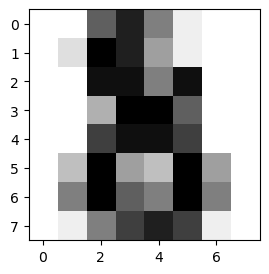

In [45]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets

import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [51]:
#It is possible to save a model in scikit-learn by using Python’s built-in persistence model, pickle:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC(gamma='scale')
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)  

SVC()

In [57]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])
y[0]

0

In [63]:
#Unless otherwise specified, input will be cast to float64:
import numpy as np
from sklearn import random_projection

'''>>> rng = np.random.RandomState(0)
>>> X = rng.rand(10, 2000)
>>> X = np.array(X, dtype='float32')
>>> X.dtype
#dtype('float32')'''

transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype


dtype('float32')

In [65]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC(gamma='scale')
clf.fit(iris.data, iris.target)  

SVC()

In [67]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [69]:
clf.fit(iris.data, iris.target_names[iris.target])  

SVC()

In [71]:
list(clf.predict(iris.data[:3])) 

['setosa', 'setosa', 'setosa']

In [75]:
'''Hyper-parameters of an estimator can be updated after it has been constructed via the set_params() method. Calling fit() more than once will overwrite what was learned by any previous fit()'''
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y)  

SVC(kernel='linear')

In [77]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [79]:
clf.set_params(kernel='rbf', gamma='scale').fit(X, y) 

SVC()

In [85]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [87]:
'''When using multiclass classifiers, the learning and prediction task that is performed is dependent on the format of the target data fit upon:'''
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(gamma='scale',
                                            random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [91]:
'''In the above case, the classifier is fit on a 1d array of multiclass labels and the predict() method therefore provides corresponding multiclass predictions. It is also possible to fit upon a 2d array of binary label indicators:'''
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [93]:
'''Here, the classifier is fit() on a 2d binary label representation of y, using the LabelBinarizer. In this case predict() returns a 2d array representing the corresponding multilabel predictions.

Note that the fourth and fifth instances returned all zeroes, indicating that they matched none of the three labels fit upon. With multilabel outputs, it is similarly possible for an instance to be assigned multiple labels:'''
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)


array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])